In [1]:
%matplotlib nbagg
import M
import matplotlib.pyplot as plt
import matplotlib.widgets
import pandas as pd

In [2]:
model = M.Model('healthcare-dataset-stroke-data.csv', 'stroke')
model.get_data()

In [3]:
models = ['LogisticRegression', 'KNeighborsClassifier', 'SVC']

# cv_f1-score and f1-score with whole var
cvf1, score = model.with_wholevar(models)

# cv_f1-score and f1-score without one var
cvf1_without_var, score_without_var = model.without_onevar(models)

In [4]:
# presnting the affect on the score without a certain varible in different models
pd.DataFrame(score_without_var)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
LogisticRegression,0.207317,0.189944,0.224852,0.216867,0.216867,0.216867,0.206061,0.210526,0.215569,0.211765
KNeighborsClassifier,0.228571,0.047619,0.146341,0.136364,0.150000,0.272727,0.136364,0.044444,0.171429,0.162162
SVC,0.218182,0.211921,0.169697,0.222222,0.213018,0.224852,0.215569,0.205714,0.223529,0.226190


<IPython.core.display.Javascript object>


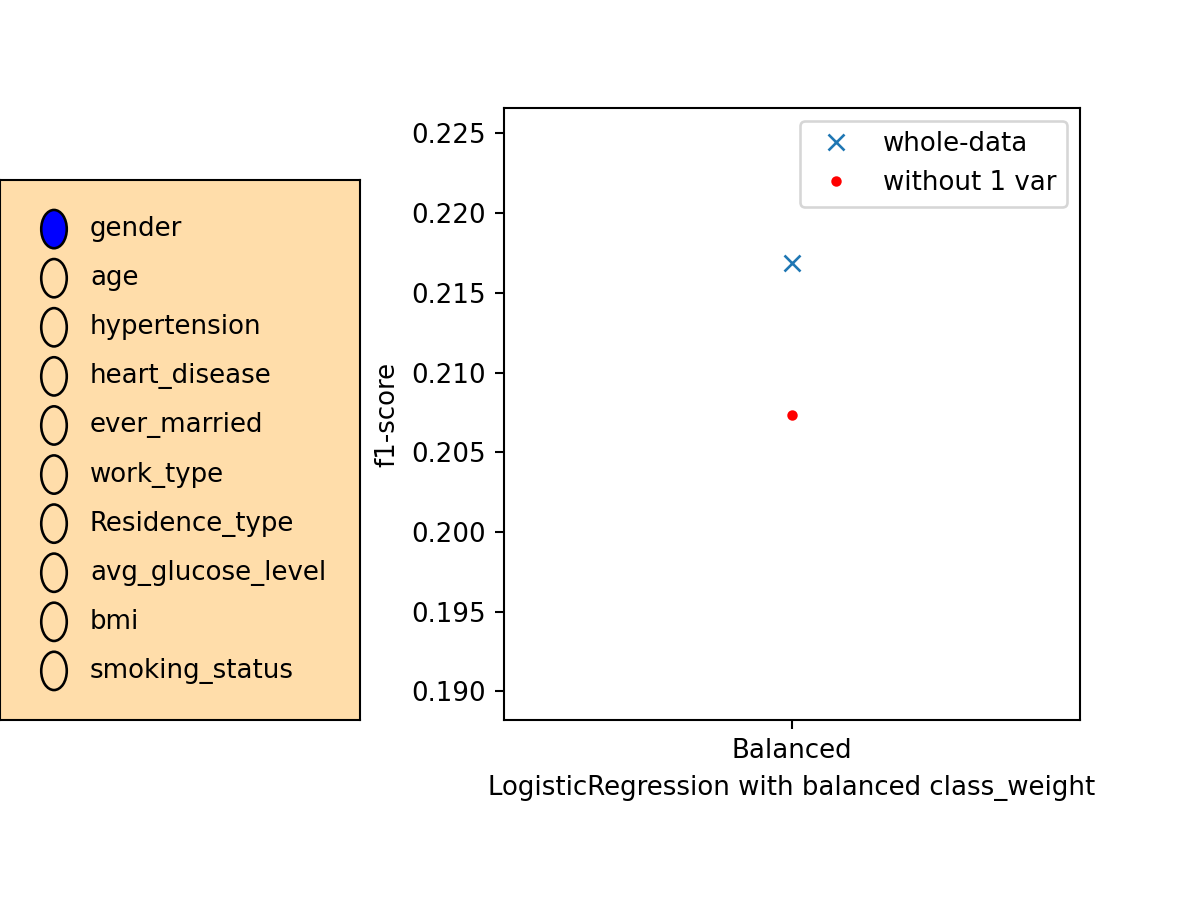

In [5]:
def callback(label):
    for name, line in lines.items():
        if name == label:
            line.set_alpha(1)
        else:
            line.set_alpha(0)
    return

fig, ax = plt.subplots()
ax.plot(['Balanced'], score['LogisticRegression'], 'x')
plt.ylabel('f1-score')
plt.xlabel('LogisticRegression with balanced class_weight')
plt.subplots_adjust(left=0.42, bottom=0.2)

# create radio box
radio_ax = plt.axes([0.0, 0.2, 0.3, 0.6], facecolor='#FFDDAA')

# create radio buttons
radio = matplotlib.widgets.RadioButtons(radio_ax, score_without_var.keys())
lines = {}
for var,value in score_without_var.items():
    if var == 'gender':
        lines[var], = ax.plot(['Balanced'], 
                            value['LogisticRegression'], 
                            '.', 
                            alpha=1,
                            color='red'
                    )
    else:
        lines[var], = ax.plot(['Balanced'], 
                              value['LogisticRegression'],
                              '.',
                              alpha=0,
                              color='red'
                    )
radio.on_clicked(callback)
ax.legend(['whole-data', 'without 1 var'])

# show the results without a certain variable graphically
plt.show()        

From the graph above, we can see that age is most correlated to the probability of stroke. Because the f1-score decrease most when removing age data.

The code and graph below shows the probability for stroke of different values of age.

<IPython.core.display.Javascript object>


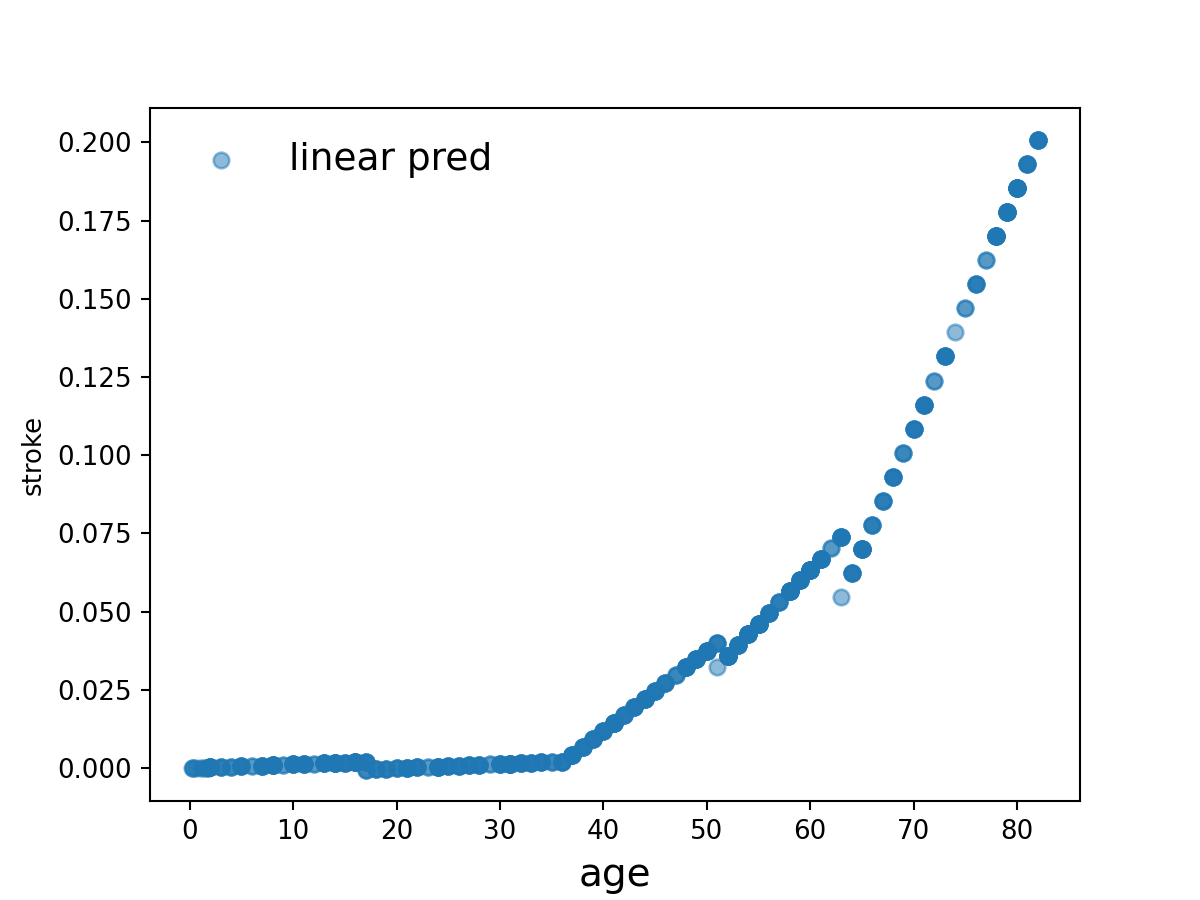

In [6]:
linear = M.linear_pred()
linear.test('age')

From the graph, we can see that the probability of stroke increase significantly when you get older and older.

## Conclusion
The score for the model is quite low, so it can not predict precisely and we need more variables to train our model. Age is most correlated to the probability and we only can know that if you are older than 40 years old, you have the probabilty (still very low) to get stroke.